# Supervised Classification Using KNearestNeighbors


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# instantiate models/estimators
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = Number Of Neighbors To Compare Data To
accuracy = metrics.accuracy_score

/Users/kerrylam/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None) 
data.columns = ["Sepal Length", "Sepal Width","Petal Length","Petal Width","Class"]
data.shape # Print Shape of DataFrame (observations, features)
data.head()


,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(data)

     Sepal Length  Sepal Width  Petal Length  Petal Width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

In [4]:
# Transform A String Category To A Given Value For Response Vector
def transform_category(category): 
    if category == 'Iris-setosa': 
        return 0
    if category == 'Iris-versicolor': 
        return 1
    if category == 'Iris-virginica': 
        return 2

data['Class'] = data['Class'].apply(transform_category)
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Separates Features From Responses
x_data = data.ix[:,0:4] 

In [6]:
features = x_data # n Observations, Features
response_vector = data["Class"] # n Response Vector
print (features.shape) # Shape Of Array for Observations And Features.(2-Dimensional)
print (response_vector.shape) # Shape Of Array In Response Vector.(1-Dimensional) 


(150, 4)
(150,)


In [7]:
# Separate Data Into A Training Set And A Testing Set 
features_train, features_test, response_vector_train, response_vector_test = \
train_test_split(features, response_vector, test_size = 0.35)

In [8]:
print ("n Observations, Features For Training Set: ", features_train.shape)
print ("n Response Vector For Training Set: ", response_vector_train.shape)
print ("n Observations, Features For Testing Set: ", features_test.shape)
print ("n Response Vector For Testing Set: ", response_vector_test.shape)

n Observations, Features For Training Set:  (97, 4)
n Response Vector For Training Set:  (97,)
n Observations, Features For Testing Set:  (53, 4)
n Response Vector For Testing Set:  (53,)


In [9]:
# Fits KNN Model With Data From Training Set
knn.fit(features_train, response_vector_train)
# Show The Predicted Responses From Testing Set
response_prediction = knn.predict(features_test)
print(response_prediction)

[1 2 0 1 0 2 1 1 2 2 2 2 1 0 2 1 1 1 0 2 2 0 0 0 2 2 0 2 0 1 0 0 1 1 0 2 0
 1 0 2 2 0 1 2 1 0 2 0 2 1 0 1 0]


In [10]:
# Compare The Accuracy From Our Testing Set With Our Training Set To See How Well Model Did
print (accuracy(response_vector_test, response_prediction)*100, "% Accuracy")

94.3396226415 % Accuracy


In [11]:
data.ix[50:55]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1


In [12]:
# Testing Model With Random Measurements From The Dataset Above
out_of_sample_data = np.array([7.0,3.2,4.7,1.4])
measurements = out_of_sample_data.reshape(1,-1)
prediction = knn.predict(measurements)
if prediction == [0]:
    print ("Iris-setosa")
elif prediction == [1]:
    print ("Iris-versicolor")
elif prediction == [2]:
    print ("Iris-virginica")

Iris-versicolor


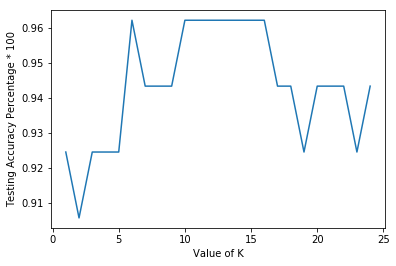

In [13]:
# Finds K-Value That Produces Highest Accuracy For The Model Using Training Set and Testing Set
k_range = range(1,25)
accuracy_scores = [] 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train, response_vector_train) # Fit Training Set Into Model
    response_prediction = knn.predict(features_test) # Extract Predicted Response With Testing Set
    accuracy_scores.append(accuracy(response_vector_test, response_prediction))

%matplotlib inline
plt.plot(k_range, accuracy_scores)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy Percentage * 100")
plt.clf
plt.show()